# Model training on Loan data

In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings("ignore")

import pickle
import json

# 1.Problem statement

# 2.Data gathering

In [52]:
df=pd.read_csv("loan_data.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


# 3.EDA

In [53]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [54]:
new_column_names={'credit.policy':'credit_policy', 'purpose':'purpose', 'int.rate':'int_rate', 'installment':'installment', 
                  'log.annual.inc':'log_annual_inc','dti':'dti', 'fico':'fico', 'days.with.cr.line':'days_with_cr_line', 
                  'revol.bal':'revol_bal','revol.util':'revol_util','inq.last.6mths':'inq_last_6mths',
                  'delinq.2yrs':'delinq_2yrs', 'pub.rec':'pub_rec', 'not.fully.paid':'not_fully_paid'}

In [55]:
df.rename(columns=new_column_names, inplace=True)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [57]:
df["purpose"].value_counts().to_dict()

{'debt_consolidation': 3957,
 'all_other': 2331,
 'credit_card': 1262,
 'home_improvement': 629,
 'small_business': 619,
 'major_purchase': 437,
 'educational': 343}

# 4.Feature Engineering

In [58]:
df=pd.get_dummies(df,columns=["purpose"])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_policy               9578 non-null   int64  
 1   int_rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log_annual_inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days_with_cr_line           9578 non-null   float64
 7   revol_bal                   9578 non-null   int64  
 8   revol_util                  9578 non-null   float64
 9   inq_last_6mths              9578 non-null   int64  
 10  delinq_2yrs                 9578 non-null   int64  
 11  pub_rec                     9578 non-null   int64  
 12  not_fully_paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [60]:
df["not_fully_paid"].value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

<AxesSubplot:xlabel='credit_policy'>

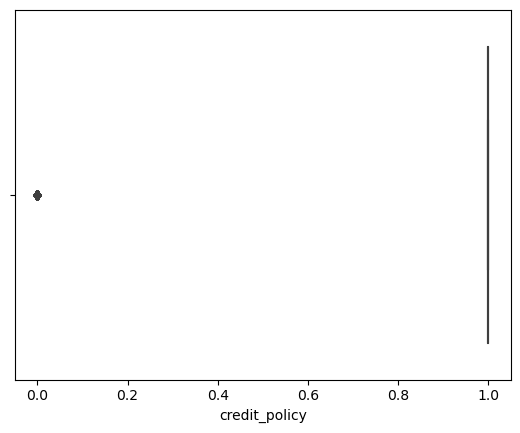

In [61]:
sns.boxplot(df["credit_policy"])

<AxesSubplot:xlabel='int_rate'>

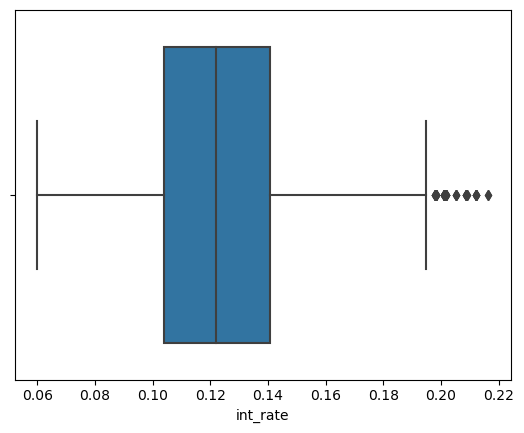

In [62]:
sns.boxplot(df["int_rate"])

<AxesSubplot:xlabel='log_annual_inc'>

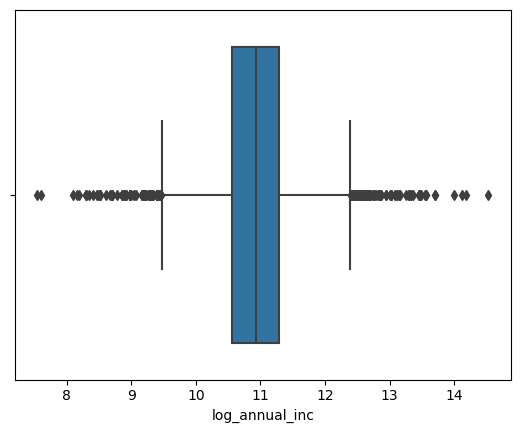

In [63]:
sns.boxplot(df["log_annual_inc"])

upper_tail: 12.39061201375
lower_tail: 9.45909442375


<AxesSubplot:xlabel='log_annual_inc'>

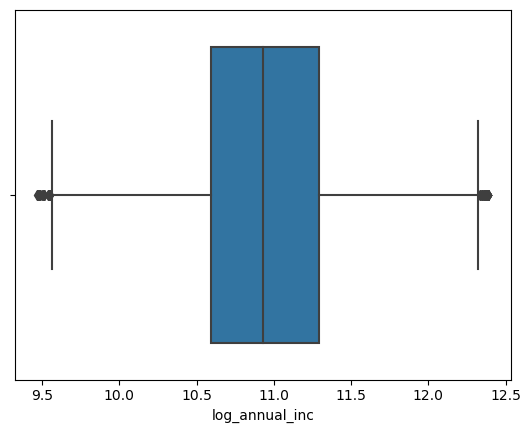

In [64]:
q1=df["log_annual_inc"].quantile(0.25)
q2=df["log_annual_inc"].quantile(0.50)
q3=df["log_annual_inc"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)
df["log_annual_inc"].loc[(df["log_annual_inc"]>upper_tail)|(df["log_annual_inc"]<lower_tail)]
mean_normalize=df["log_annual_inc"].loc[(df["log_annual_inc"]<=upper_tail)&
                                             (df["log_annual_inc"]>=lower_tail)].mean()
df.loc[(df["log_annual_inc"]>upper_tail)|(df["log_annual_inc"]<lower_tail)]=mean_normalize
df["log_annual_inc"].loc[(df["log_annual_inc"]>upper_tail)|(df["log_annual_inc"]<lower_tail)]
sns.boxplot(df["log_annual_inc"])

<AxesSubplot:xlabel='dti'>

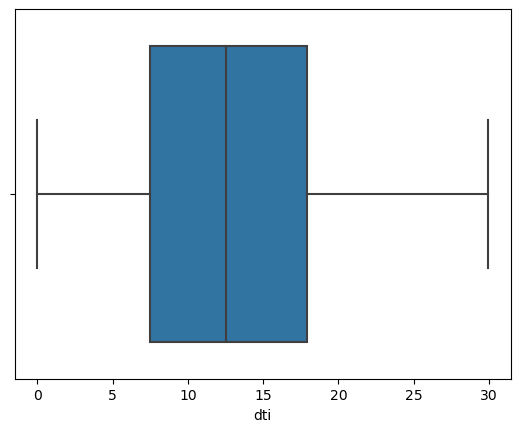

In [65]:
sns.boxplot(df["dti"])

<AxesSubplot:xlabel='fico'>

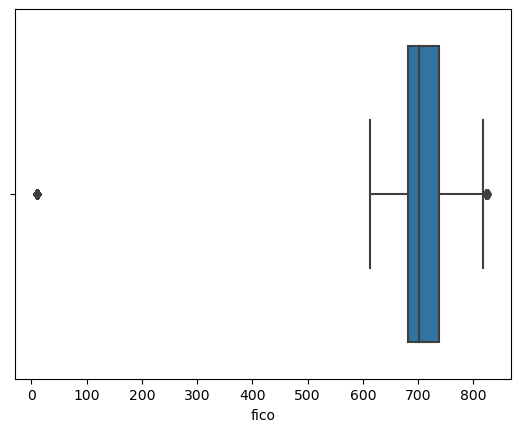

In [66]:
sns.boxplot(df["fico"])

upper_tail: 819.5
lower_tail: 599.5


<AxesSubplot:xlabel='fico'>

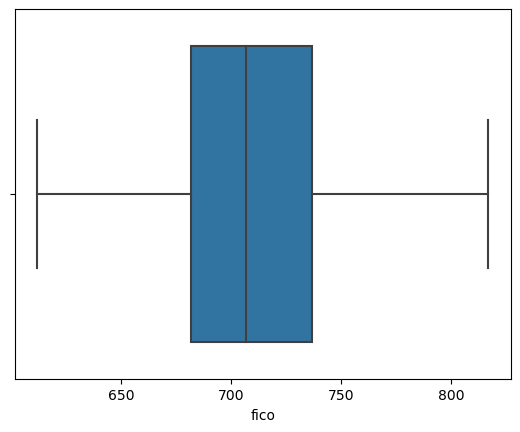

In [67]:
q1=df["fico"].quantile(0.25)
q2=df["fico"].quantile(0.50)
q3=df["fico"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)
df["fico"].loc[(df["fico"]>upper_tail)|(df["fico"]<lower_tail)]
mean_normalize=df["fico"].loc[(df["fico"]<=upper_tail)&
                                             (df["fico"]>=lower_tail)].mean()
df.loc[(df["fico"]>upper_tail)|(df["fico"]<lower_tail)]=mean_normalize
df["fico"].loc[(df["fico"]>upper_tail)|(df["fico"]<lower_tail)]
sns.boxplot(df["fico"])

<AxesSubplot:xlabel='days_with_cr_line'>

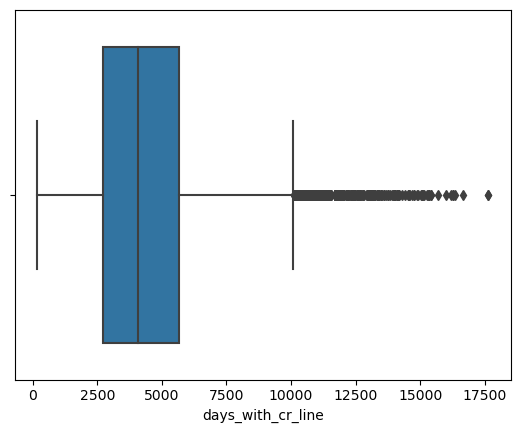

In [68]:
sns.boxplot(df["days_with_cr_line"])

<AxesSubplot:xlabel='revol_bal'>

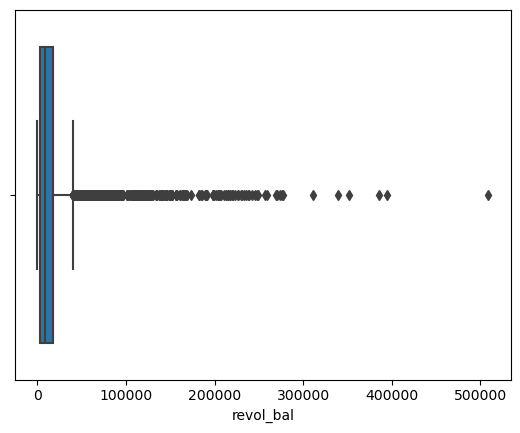

In [69]:
sns.boxplot(df["revol_bal"])

upper_tail: 40051.5
lower_tail: -19378.5


<AxesSubplot:xlabel='revol_bal'>

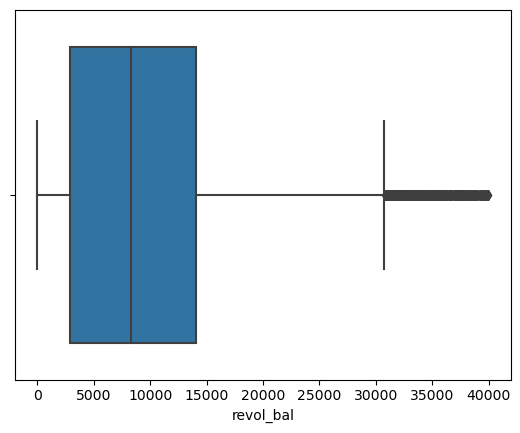

In [70]:
q1=df["revol_bal"].quantile(0.25)
q2=df["revol_bal"].quantile(0.50)
q3=df["revol_bal"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)
df["revol_bal"].loc[(df["revol_bal"]>upper_tail)|(df["revol_bal"]<lower_tail)]
mean_normalize=df["revol_bal"].loc[(df["revol_bal"]<=upper_tail)&
                                             (df["revol_bal"]>=lower_tail)].mean()
df.loc[(df["revol_bal"]>upper_tail)|(df["revol_bal"]<lower_tail)]=mean_normalize
df["revol_bal"].loc[(df["revol_bal"]>upper_tail)|(df["revol_bal"]<lower_tail)]
sns.boxplot(df["revol_bal"])

<AxesSubplot:xlabel='revol_util'>

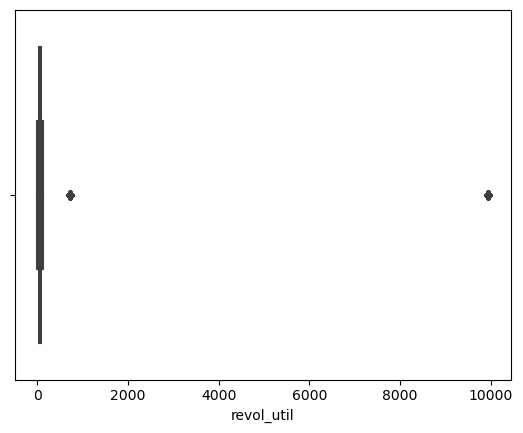

In [71]:
sns.boxplot(df["revol_util"])

<AxesSubplot:xlabel='inq_last_6mths'>

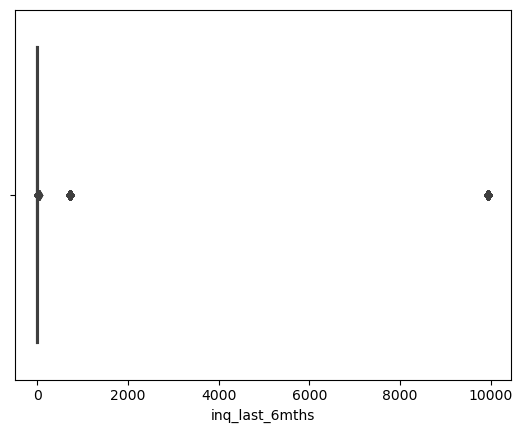

In [72]:
sns.boxplot(df["inq_last_6mths"])

upper_tail: 7.5
lower_tail: -4.5


<AxesSubplot:xlabel='inq_last_6mths'>

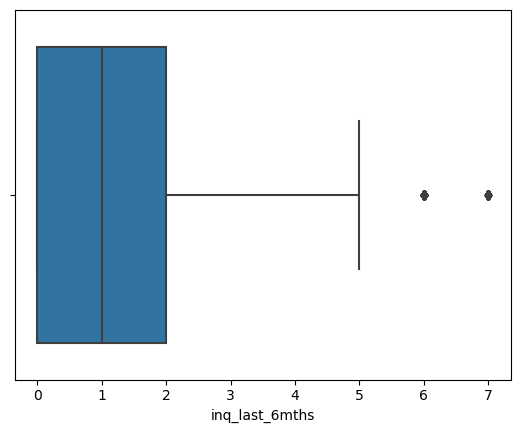

In [73]:
q1=df["inq_last_6mths"].quantile(0.25)
q2=df["inq_last_6mths"].quantile(0.50)
q3=df["inq_last_6mths"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)
df["inq_last_6mths"].loc[(df["inq_last_6mths"]>upper_tail)|(df["inq_last_6mths"]<lower_tail)]
mean_normalize=df["inq_last_6mths"].loc[(df["inq_last_6mths"]<=upper_tail)&
                                             (df["inq_last_6mths"]>=lower_tail)].mean()
df.loc[(df["inq_last_6mths"]>upper_tail)|(df["inq_last_6mths"]<lower_tail)]=mean_normalize
df["inq_last_6mths"].loc[(df["inq_last_6mths"]>upper_tail)|(df["inq_last_6mths"]<lower_tail)]
sns.boxplot(df["inq_last_6mths"])

<AxesSubplot:xlabel='delinq_2yrs'>

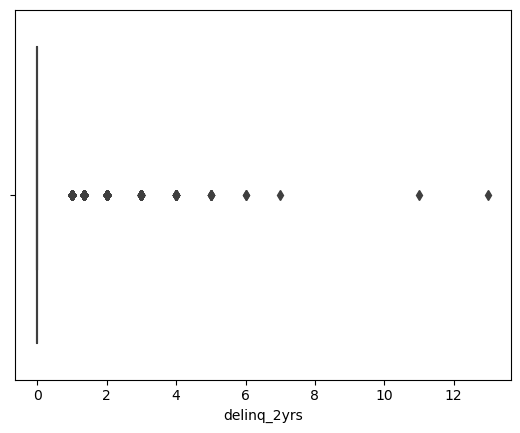

In [74]:
sns.boxplot(df["delinq_2yrs"])

upper_tail: 0.0
lower_tail: 0.0


<AxesSubplot:xlabel='delinq_2yrs'>

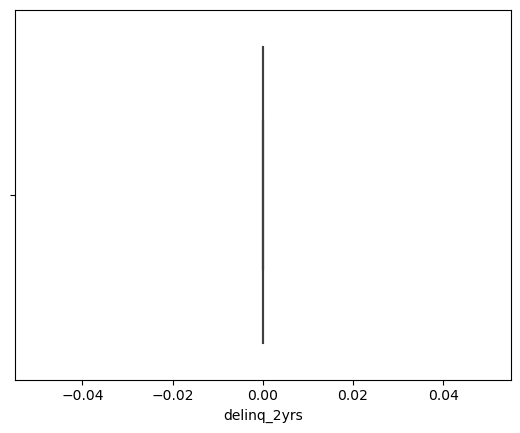

In [75]:
q1=df["delinq_2yrs"].quantile(0.25)
q2=df["delinq_2yrs"].quantile(0.50)
q3=df["delinq_2yrs"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)
df["delinq_2yrs"].loc[(df["delinq_2yrs"]>upper_tail)|(df["delinq_2yrs"]<lower_tail)]
mean_normalize=df["delinq_2yrs"].loc[(df["delinq_2yrs"]<=upper_tail)&
                                             (df["delinq_2yrs"]>=lower_tail)].mean()
df.loc[(df["delinq_2yrs"]>upper_tail)|(df["delinq_2yrs"]<lower_tail)]=mean_normalize
df["delinq_2yrs"].loc[(df["delinq_2yrs"]>upper_tail)|(df["delinq_2yrs"]<lower_tail)]
sns.boxplot(df["delinq_2yrs"])

<AxesSubplot:xlabel='pub_rec'>

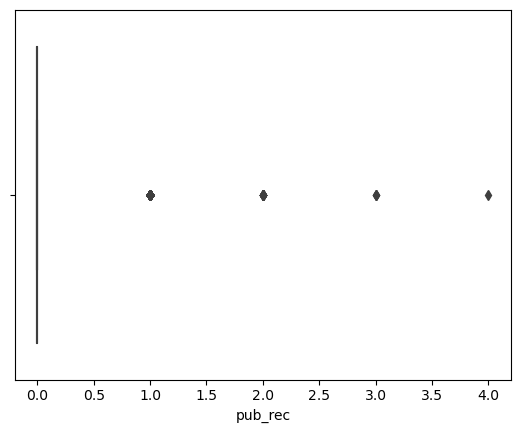

In [76]:
sns.boxplot(df["pub_rec"])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_policy               9578 non-null   float64
 1   int_rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log_annual_inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   float64
 6   days_with_cr_line           9578 non-null   float64
 7   revol_bal                   9578 non-null   float64
 8   revol_util                  9578 non-null   float64
 9   inq_last_6mths              9578 non-null   float64
 10  delinq_2yrs                 9578 non-null   float64
 11  pub_rec                     9578 non-null   float64
 12  not_fully_paid              9578 non-null   float64
 13  purpose_all_other           9578 

# 5.Feature Selection

In [78]:
x=df.drop("not_fully_paid",axis=1)
y=df["not_fully_paid"]

In [79]:
df['not_fully_paid'].value_counts()

0.0    8500
1.0    1078
Name: not_fully_paid, dtype: int64

<AxesSubplot:xlabel='not_fully_paid', ylabel='count'>

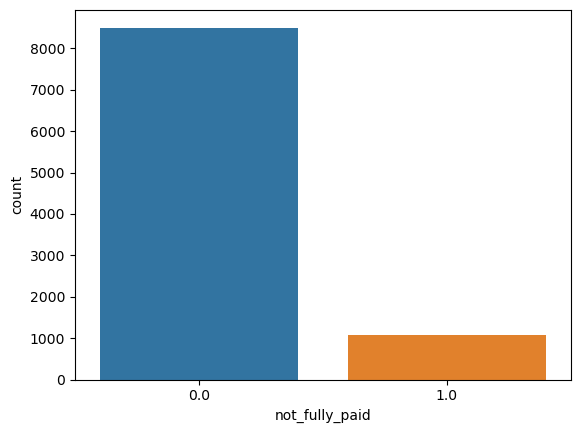

In [80]:
sns.countplot(x = df['not_fully_paid'])

# 6.Model Building

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10,stratify=y)

In [82]:
model=LogisticRegression()

In [83]:
model.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_test.value_counts()

0.0    2125
1.0     270
Name: not_fully_paid, dtype: int64

In [85]:
y_train.value_counts()

0.0    6375
1.0     808
Name: not_fully_paid, dtype: int64

# 7.Mode Evaluation

In [86]:
# Testing accuracy
y_pred=model.predict(x_test)
cnf_matrix=confusion_matrix(y_pred,y_test)
accuracy=accuracy_score(y_pred,y_test)
clf_report=classification_report(y_pred,y_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*50)
print("Accuracy:\n",accuracy)
print("*"*50)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[2051  230]
 [  74   40]]
**************************************************
Accuracy:
 0.8730688935281837
**************************************************
Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      2281
         1.0       0.15      0.35      0.21       114

    accuracy                           0.87      2395
   macro avg       0.56      0.63      0.57      2395
weighted avg       0.93      0.87      0.90      2395



In [87]:
model.score(x_test, y_test)

0.8730688935281837

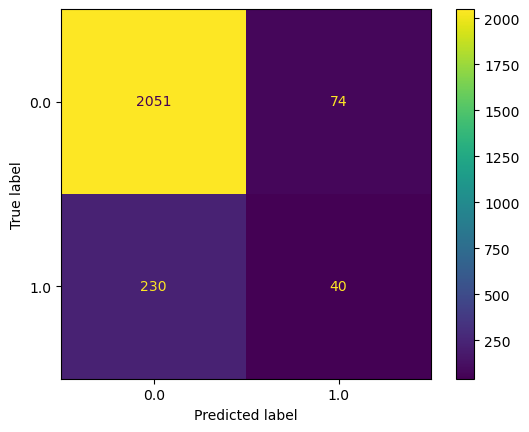

In [88]:
plot_confusion_matrix(model,x_test,y_test)

In [89]:
y_pred_prob=model.predict_proba(x_test)
y_pred_prob

array([[0.83683439, 0.16316561],
       [0.86367204, 0.13632796],
       [0.95292981, 0.04707019],
       ...,
       [0.92740607, 0.07259393],
       [0.92622473, 0.07377527],
       [0.94963462, 0.05036538]])

In [90]:
# Training accuracy
y_pred_train=model.predict(x_train)
cnf_matrix=confusion_matrix(y_pred_train,y_train)
accuracy=accuracy_score(y_pred_train,y_train)
clf_report=classification_report(y_pred_train,y_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*50)
print("Accuracy:\n",accuracy)
print("*"*50)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[6194  716]
 [ 181   92]]
**************************************************
Accuracy:
 0.8751218153974663
**************************************************
Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      6910
         1.0       0.11      0.34      0.17       273

    accuracy                           0.88      7183
   macro avg       0.54      0.62      0.55      7183
weighted avg       0.94      0.88      0.90      7183



In [91]:
model.score(x_train, y_train)

0.8751218153974663

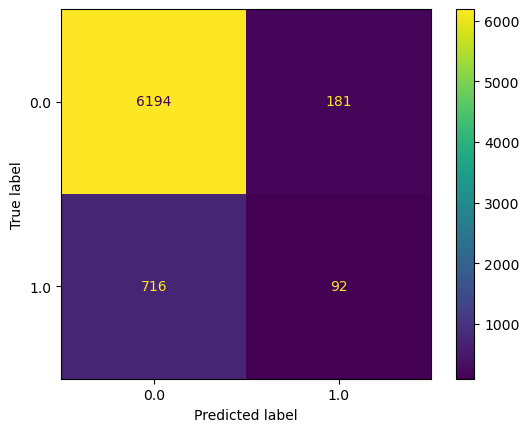

In [92]:
plot_confusion_matrix(model,x_train,y_train)

In [93]:
y_pred_prob=model.predict_proba(x_train)
y_pred_prob

array([[0.90817372, 0.09182628],
       [0.9283785 , 0.0716215 ],
       [0.93792346, 0.06207654],
       ...,
       [0.78659666, 0.21340334],
       [0.65284943, 0.34715057],
       [0.78659666, 0.21340334]])

In [94]:
# AUC-ROC

In [95]:
y_pred_prob = model.predict_proba(x_train)   
y_pred_prob[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_pred_prob[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics Curve')

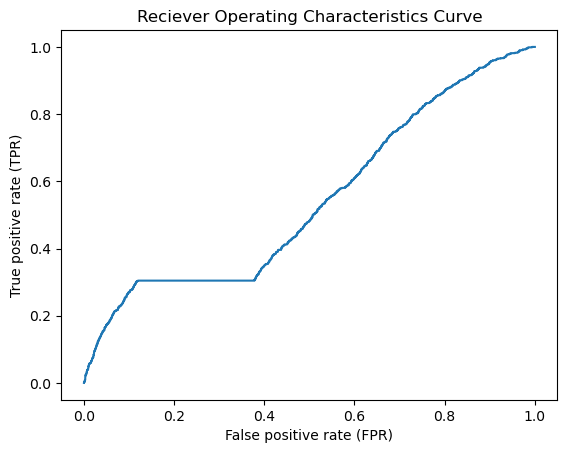

In [96]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("Reciever Operating Characteristics Curve")

In [97]:
auc_value = auc(fpr, tpr)
auc_value

0.5435496020190255

In [98]:
x.head(1).T

,0
credit_policy,1.000000
int_rate,0.118900
installment,829.100000
log_annual_inc,11.350407
dti,19.480000
fico,737.000000
days_with_cr_line,5639.958333
revol_bal,28854.000000
revol_util,52.100000
inq_last_6mths,0.000000


In [99]:
column_names=x.columns

In [100]:
len(column_names)

19

In [101]:
with open("logestic_model.pkl","wb") as f:
    pickle.dump(model,f)

In [102]:
json_data={"columns":list(column_names)}
json_data

{'columns': ['credit_policy',
  'int_rate',
  'installment',
  'log_annual_inc',
  'dti',
  'fico',
  'days_with_cr_line',
  'revol_bal',
  'revol_util',
  'inq_last_6mths',
  'delinq_2yrs',
  'pub_rec',
  'purpose_all_other',
  'purpose_credit_card',
  'purpose_debt_consolidation',
  'purpose_educational',
  'purpose_home_improvement',
  'purpose_major_purchase',
  'purpose_small_business']}

In [103]:
with open("project_data.json","w") as f:
    json.dump(json_data,f)

In [104]:
# Single User Input Testing

In [105]:
credit_policy=1.000000
int_rate=0.118900
installment=829.100000
log_annual_inc=11.350407
dti=19.480000
fico=737.000000
days_with_cr_line=5639.958333
revol_bal=28854.000000
revol_util=52.100000
inq_last_6mths=0.000000
delinq_2yrs=0.000000
pub_rec=0.000000
purpose="credit_card"
purpose="purpose_"+purpose

In [108]:
purpose_index=list(column_names).index(purpose)

In [109]:
x.shape[1]

19

In [110]:
json_data["columns"]

['credit_policy',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'purpose_all_other',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [111]:
test_array=np.zeros(len(column_names))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [112]:
test_array=np.zeros(len(column_names))
test_array[0]=credit_policy
test_array[1]=int_rate
test_array[2]=installment
test_array[3]=log_annual_inc
test_array[4]=dti
test_array[5]=fico
test_array[6]=days_with_cr_line
test_array[7]=revol_bal
test_array[8]=revol_util
test_array[9]=inq_last_6mths
test_array[10]=delinq_2yrs
test_array[11]=pub_rec
test_array[purpose_index]=1

In [113]:
charges=round(model.predict([test_array])[0],2)

In [114]:
if charges==1:
    print("you have some amount left contact to branch immediately")
else:
    print("Your Loan Is appruved")

Your Loan Is appruved
